In [1]:
import pandas as pd
import numpy as np

graph = pd.read_csv("/content/drive/MyDrive/ML_Self/gaDataset.csv")

In [2]:
graph

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.000000,0.317431,0.000000,0.000000,0.000000,0.000000,0.576919,0.289324,0.671348,0.000000,...,0.000000,0.313713,0.000000,0.299012,0.235578,0.000000,0.780726,0.000000,0.000000,0.289625
1,0.317431,1.000000,0.000000,0.000000,0.000000,0.000000,0.714862,0.822655,0.602483,0.000000,...,0.933880,0.947340,0.941445,0.904016,0.505615,0.000000,0.000000,0.528350,0.727852,0.955490
2,0.000000,0.000000,1.000000,0.951447,0.592701,0.866782,0.000000,0.000000,0.000000,0.993307,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.856804,0.186937,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.951447,1.000000,0.631769,0.811406,0.000000,0.000000,0.000000,0.951022,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.760581,0.216275,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.592701,0.631769,1.000000,0.453799,0.000000,0.000000,0.000000,0.608206,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.554679,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.856804,0.760581,0.554679,0.853041,0.000000,0.000000,0.000000,0.835420,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
124,0.780726,0.000000,0.186937,0.216275,0.000000,0.000000,0.180457,0.000000,0.583881,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
125,0.000000,0.528350,0.000000,0.000000,0.000000,0.000000,0.000000,0.307665,0.436730,0.000000,...,0.535870,0.381950,0.555975,0.308823,0.000000,0.000000,0.000000,1.000000,0.338608,0.675058
126,0.000000,0.727852,0.000000,0.000000,0.000000,0.000000,0.586324,0.887310,0.000000,0.000000,...,0.860253,0.875745,0.867047,0.876748,0.792593,0.000000,0.000000,0.338608,1.000000,0.641267


In [6]:
import numpy as np
import random

POPULATION = 64
VERTICES = graph.shape[0]

EPOCHS = 100

TOURNAMENTS = 5
MUTATION = 0.1

allMinfitnesses = []

def initializePopulation():
  population = []

  randomSet = [0, 2]

  for num in range(POPULATION):
    chs = np.random.randint(0, 2, VERTICES)
    # chs = [randomSet[chs[i]] for i in range(len(chs))]

    # print(chs)

    population.append(chs)

  # print(len(population))

  return population

def calculateFitness(sol, arr):
  fitness = np.sum(sol)

  penalty = 0
  for i in range(VERTICES):
    if sol[i] == 0:
      neighbors = np.nonzero(arr[i])[0]
      if not any(sol[neighbor] == 2 for neighbor in neighbors):
        penalty += 10

      # print(penalty)

  return fitness + penalty

def tournamentSelection(population, fitnesses):
    tournament = random.sample(list(zip(population, fitnesses)), TOURNAMENTS)

    # print(tournament)

    tournament.sort(key=lambda x: x[1])

    # print(tournament[0][0])

    return tournament[0][0]

def crossover(p1, p2):
  offspring = np.copy(p1)

  for i in range(VERTICES):
      if random.random() < 0.5:
          offspring[i] = p2[i]

  # print(offspring)

  return offspring

def mutate(chromosome):
  randomSet = [0, 2]

  for i in range(VERTICES):
      if random.random() < MUTATION:
          # chromosome[i] = randomSet[random.randint(0, 1)]
          chromosome[i] = random.randint(0, 2)
  return chromosome

def ga(arr):
    population = initializePopulation()

    # print(len(population[0]))

    solution = None
    fitness = float('inf')

    for i in range(EPOCHS):

      fitnesses = []
      for sol in population:
        fitnesses.append(calculateFitness(sol, arr))

      minFitness = min(fitnesses)
      if minFitness < fitness:
          fitness = minFitness
          solution = population[fitnesses.index(minFitness)]

      allMinfitnesses.append(minFitness)

      # if i == 0:
      #   print(minFitness, solution)

      offsprings = []
      for j in range(POPULATION):
          p1 = tournamentSelection(population, fitnesses)
          p2 = tournamentSelection(population, fitnesses)

          # print("p1 ", p1)
          # print("p2 ", p2)

          offspring = crossover(p1, p2)

          # print(offspring)

          offspring = mutate(offspring)
          offsprings.append(offspring)

          # if j == 0:
          #   break

      # if i == 0:
      #   break

      population = offsprings

    return solution, fitness

arr = graph.values
solution, fitness = ga(arr)

print(fitness)

count = 0
for c in solution:
  if c == 2:
    count += 1

print(count)

39
10


In [7]:
def check_feasibility(sol, arr):
    for i in range(VERTICES):
        if sol[i] == 0:
            neighbors = arr[i] > 0
            if not any(sol[j] == 2 for j in range(VERTICES) if neighbors[j]):
                return False
    return True

is_feasible = check_feasibility(solution, arr)
is_feasible

True

In [8]:
allMinfitnesses

[596,
 68,
 66,
 65,
 68,
 65,
 65,
 61,
 63,
 60,
 56,
 59,
 57,
 52,
 51,
 53,
 53,
 49,
 51,
 53,
 46,
 49,
 51,
 52,
 51,
 52,
 52,
 52,
 51,
 52,
 54,
 53,
 53,
 53,
 50,
 56,
 55,
 55,
 51,
 53,
 56,
 49,
 51,
 52,
 49,
 48,
 50,
 43,
 49,
 45,
 47,
 44,
 48,
 39,
 45,
 44,
 44,
 40,
 45,
 47,
 46,
 48,
 46,
 51,
 49,
 53,
 54,
 49,
 51,
 54,
 53,
 50,
 55,
 51,
 55,
 52,
 50,
 51,
 46,
 47,
 48,
 49,
 49,
 45,
 48,
 47,
 47,
 45,
 48,
 50,
 50,
 47,
 52,
 48,
 50,
 54,
 48,
 49,
 50,
 48]

In [9]:
x = [i for i in range(EPOCHS)]
y = allMinfitnesses

# x, y

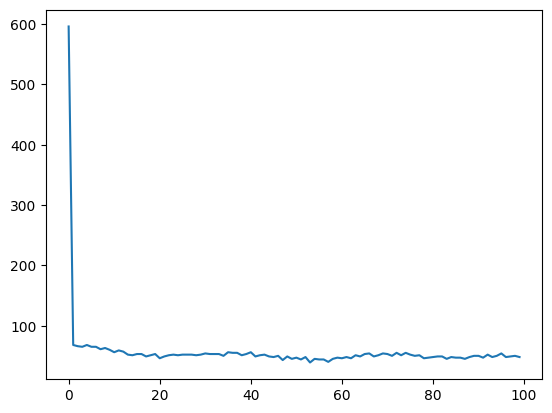

In [10]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.show()

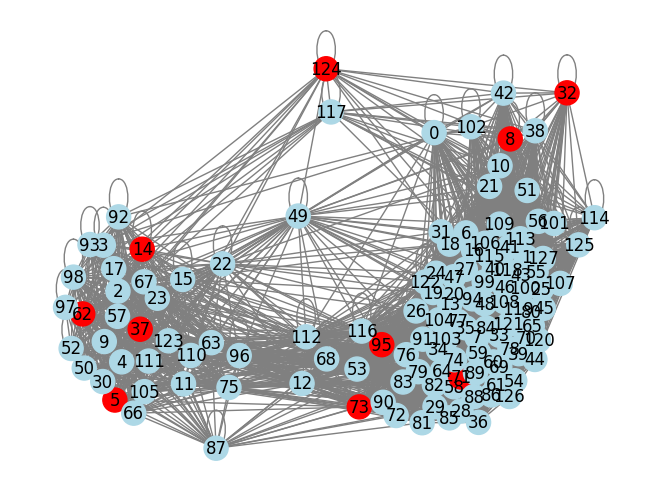

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.from_numpy_array(arr)
colors = ['lightblue' if solution[i] != 2 else 'red' for i in range(len(solution))]

nx.draw(graph, with_labels=True, node_color=colors, edge_color='gray')
plt.show()